In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy.stats import pearsonr, f_oneway
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.feature_selection import SelectKBest, mutual_info_classif, f_classif, chi2
from sklearn.linear_model import LinearRegression
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler



<span style="color:red">Reading the csv Files</span>

In [7]:
mat_df = pd.read_csv("Data/student-mat.csv", sep = ';')
port_df = pd.read_csv("Data/student-por.csv", sep = ';')


<span style="color:red">Taking look at the data</span>

In [8]:
mat_df.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

<span style="color:red">Info about column values</span>

In [9]:
for column in mat_df.columns:
    print(column, set(mat_df[column].values), mat_df[column].values.dtype)

school {'GP', 'MS'} object
sex {'F', 'M'} object
age {15, 16, 17, 18, 19, 20, 21, 22} int64
address {'U', 'R'} object
famsize {'GT3', 'LE3'} object
Pstatus {'T', 'A'} object
Medu {0, 1, 2, 3, 4} int64
Fedu {0, 1, 2, 3, 4} int64
Mjob {'at_home', 'other', 'teacher', 'health', 'services'} object
Fjob {'at_home', 'other', 'teacher', 'health', 'services'} object
reason {'reputation', 'other', 'course', 'home'} object
guardian {'mother', 'other', 'father'} object
traveltime {1, 2, 3, 4} int64
studytime {1, 2, 3, 4} int64
failures {0, 1, 2, 3} int64
schoolsup {'no', 'yes'} object
famsup {'no', 'yes'} object
paid {'no', 'yes'} object
activities {'no', 'yes'} object
nursery {'no', 'yes'} object
higher {'no', 'yes'} object
internet {'no', 'yes'} object
romantic {'no', 'yes'} object
famrel {1, 2, 3, 4, 5} int64
freetime {1, 2, 3, 4, 5} int64
goout {1, 2, 3, 4, 5} int64
Dalc {1, 2, 3, 4, 5} int64
Walc {1, 2, 3, 4, 5} int64
health {1, 2, 3, 4, 5} int64
absences {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11

<span style="color:red">Splitting separate the fetures and target data</span>

In [10]:
X = mat_df.iloc[:, :-3]
y = mat_df.iloc[:, -1]
Xcolums = X.columns
ycolumns = 'G3'

<span style="color:red">Splitting the data</span>

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1)


<span style="color:red">Converting and reshaping the data</span>

In [12]:
y_train = y_train.to_numpy()

y_test = y_test.to_numpy()
X_train = X_train.to_numpy()
X_test = X_test.to_numpy()

In [13]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((276, 30), (119, 30), (276,), (119,))

<span style="color:red">Encoding and scaling the data </span>

In [14]:
transformer = ColumnTransformer(transformers = [('onehot', OneHotEncoder(drop = 'first'), [0,1,3,4,5,8,9,10,11,15,16,17,18,19,20,21,22]),
                                               ('scaler', StandardScaler(), [2,6,7,12,13,14,23,24,25,26,27,28,29,])],
                                               remainder = 'passthrough')

transformer.fit(X_train)
X_train_encoded = transformer.transform(X_train)
X_test_encoded = transformer.transform(X_test)


#transformer['scaler'].mean_

In [15]:
print(X_train_encoded.shape)

(276, 39)


<span style="color:red">Fitting the model, without the feature selection  </span>

In [16]:
model = LinearRegression()

model.fit(X_train_encoded, y_train)

LinearRegression()

<span style="color:red">Making the predictions, and calculaiong the residuals </span>

In [17]:
yhat = np.round(model.predict(X_test_encoded)*2)/2

<span style="color:red">Rsquared  </span>

In [18]:
model.score(X_test_encoded, y_test)

-0.2461850829900727

In [19]:
residuals = y_test - yhat

In [48]:
#compare = pd.DataFrame(np.concatenate((y_test.reshape(-1,1), yhat.reshape(-1,1)), axis = 1), columns = ['Grades', 'Predictions'])

In [27]:
print(X_train.shape[1])

30


<span style="color:red">Poltting the predictions </span>

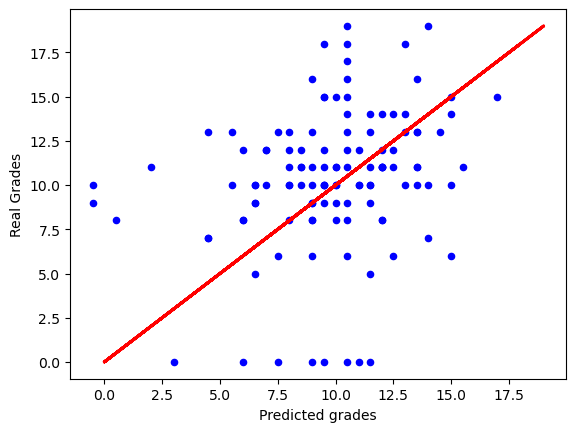

In [21]:

plt.scatter(yhat, y_test, marker = 'o', s = 20, color = 'blue')
plt.plot(y_test, y_test, lw = 2, color = 'red')
plt.xlabel('Predicted grades')
plt.ylabel('Real Grades')
plt.show()

<span style= 'color: blue'>As we can see, the linear regression model with no feature selection is no a opitam way of predicing the grades, hardly any grades had beed predicted correctly, and the Rquared of the model is -0.24, meaning the straing line is better for prediction than using our model, lets analise how feature selecton will affect the model accuracy</span>

<span style= 'color: red'>For Oridnal Variables we are going to use Kendall rank correlation coefficient, no one-way ANOVA is the way to go, as Kendall tau is for oridnal variables</span>

In [33]:
train_features = {i:kendalltau(X_train[:,i], y_train) for i in range(X_train.shape[1])}    
test_features = {i:kendalltau(X_test[:,i], y_test) for i in range(X_test.shape[1])}

In [34]:
train_features

{0: SignificanceResult(statistic=-0.08704466998412828, pvalue=0.08897097872038225),
 1: SignificanceResult(statistic=0.1001567772032428, pvalue=0.05034026862718748),
 2: SignificanceResult(statistic=-0.15047758726453697, pvalue=0.001106167159873858),
 3: SignificanceResult(statistic=0.12902922827776112, pvalue=0.011694594814457879),
 4: SignificanceResult(statistic=0.06513390465575285, pvalue=0.20311916599334034),
 5: SignificanceResult(statistic=-0.046432326010847264, pvalue=0.3642552388180549),
 6: SignificanceResult(statistic=0.220252505506087, pvalue=2.7478629604407293e-06),
 7: SignificanceResult(statistic=0.1550846794990746, pvalue=0.0009077771926033974),
 8: SignificanceResult(statistic=0.0728623183658851, pvalue=0.11671201962200102),
 9: SignificanceResult(statistic=0.04388927177873733, pvalue=0.36158505735426894),
 10: SignificanceResult(statistic=0.09341879885741833, pvalue=0.04837764420667169),
 11: SignificanceResult(statistic=-0.07729101135017344, pvalue=0.1202216273021268

In [35]:
test_features

{0: SignificanceResult(statistic=0.017742681500368847, pvalue=0.8216101576804359),
 1: SignificanceResult(statistic=0.05666446581032106, pvalue=0.4714673357775191),
 2: SignificanceResult(statistic=-0.09761531354146018, pvalue=0.16966849781734927),
 3: SignificanceResult(statistic=0.0320204252657369, pvalue=0.684069331612412),
 4: SignificanceResult(statistic=0.02948999642840903, pvalue=0.7078391749326931),
 5: SignificanceResult(statistic=0.05648497664707337, pvalue=0.4728727825369402),
 6: SignificanceResult(statistic=0.06533301401473458, pvalue=0.3628545051471479),
 7: SignificanceResult(statistic=0.07271225526613011, pvalue=0.3114137873543179),
 8: SignificanceResult(statistic=0.06362395038143066, pvalue=0.3732083744077369),
 9: SignificanceResult(statistic=0.02100543715355581, pvalue=0.7786136475432914),
 10: SignificanceResult(statistic=0.0838258504766839, pvalue=0.250168230729647),
 11: SignificanceResult(statistic=-0.027529727465425813, pvalue=0.71918795628318),
 12: Significan

In [1]:
# selector = SelectKBest(f_classif, k='all')
# selector.fit(X_train_encoded,y_train)
# selector.transform(X_train_encoded)
# selector.transform(X_test_encoded)
# scores = selector.scores_
# print(scores)
# sns.barplot(x = [x for x in range(len(scores))], y =scores)
# plt.xticks(rotate = 90)

In [ ]:
#TODO:
# -split the data first,done
# -encode the data,done
# -scale the data,done
# -make the feature evalueation using chi2 test combinesd withh Select KBest,NIEWIEWNININASOINDMAS #Use spearman or Kendall rank correlation!
# -fit the chi square test on traningX , traningy, (so you get the transoformer)
# -apply the transorer on the traning data,ass wel ass on the testing data